In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df_raw  = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df_raw.head()
df_raw.shape


(1599, 12)

In [3]:
#checkinning if there is any null value
df_raw.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

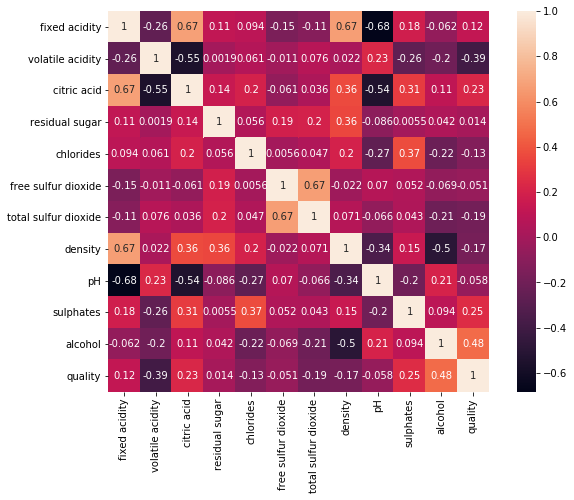

In [4]:
plt.subplots(figsize=(10,7))
sns.heatmap(df_raw.corr(), annot= True, square= True)


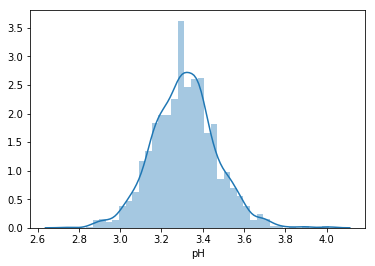

In [5]:
sns.distplot(df_raw['pH'], label ='pH')

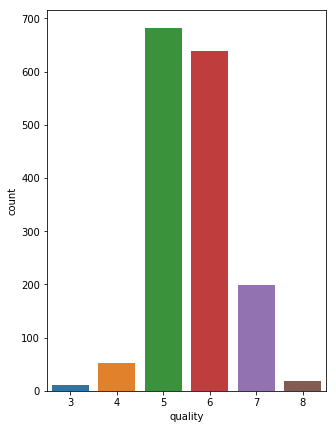

In [6]:

df_raw['quality'].value_counts()

plt.subplots(figsize=(5,7))
sns.countplot(df_raw['quality'])

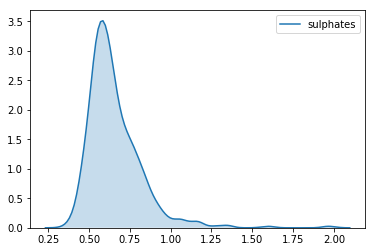

In [7]:
# sns.kdeplot(df_raw['quality'], shade= True, label ='quality')
sns.kdeplot(df_raw['sulphates'], shade= True, label ='sulphates')


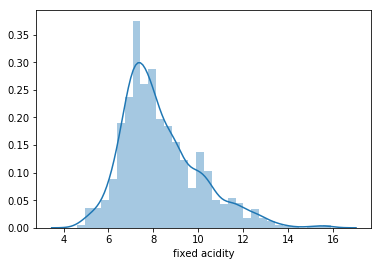

In [8]:
sns.distplot(df_raw['fixed acidity'], label ='fixed acidity')
# sns.distplot(df_raw['citric acid'], label ='citric acid')

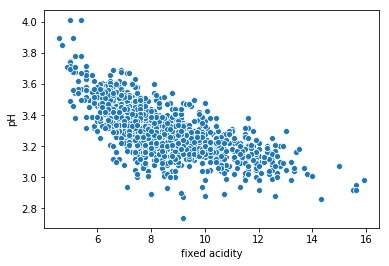

In [9]:
sns.scatterplot(x= df_raw['fixed acidity'], y= df_raw['pH'])


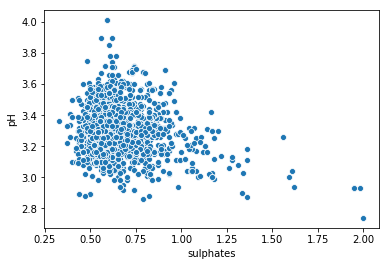

In [10]:
sns.scatterplot(x= df_raw['sulphates'], y= df_raw['pH'],  sizes=(10, 200))


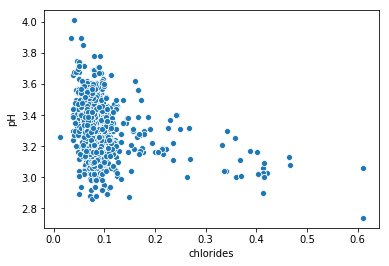

In [11]:
sns.scatterplot(x= df_raw['chlorides'], y= df_raw['pH'],  sizes=(10, 200))


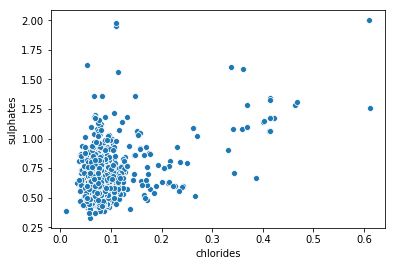

In [12]:
sns.scatterplot(x= df_raw['chlorides'], y= df_raw['sulphates'],  sizes=(10, 200))


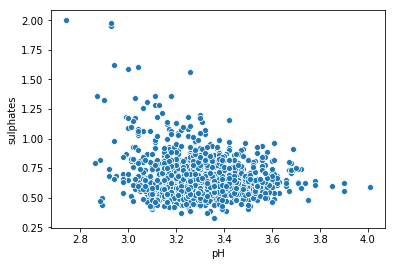

In [13]:
sns.scatterplot(x= df_raw['pH'], y= df_raw['sulphates'],  sizes=(10, 200))


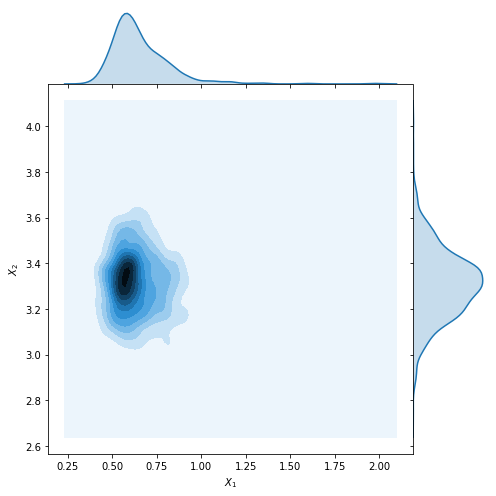

In [14]:
x1 = pd.Series(df_raw['sulphates'], name="$X_1$")
x2 = pd.Series(df_raw['pH'], name="$X_2$")

# Show the joint distribution using kernel density estimation
sns.jointplot(x1, x2, kind="kde", height=7, space=0)

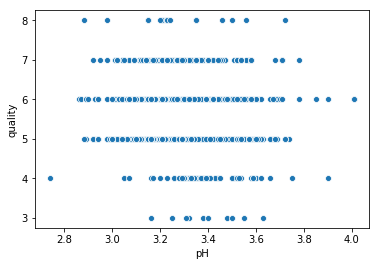

In [15]:
sns.scatterplot(x= df_raw['pH'], y= df_raw['quality'],  sizes=(10, 200))


In [16]:
# anova test to  see if these two are independet or not


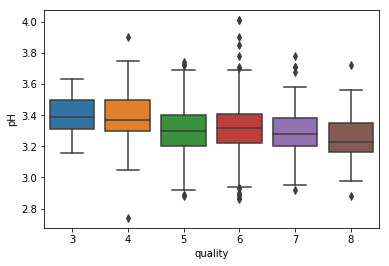

In [17]:
sns.boxplot(x= df_raw['quality'], y= df_raw['pH'])

In [18]:
# sns.kdeplot(df_raw['sulphates'], shade= True, label ='sulphates')
# sns.kdeplot(df_raw['Chlorides'], shade= True, label ='chlorides')

In [19]:
# df_raw.groupby(['quality','fixed acidity','pH']).sum()
df_raw.groupby('quality').sum()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110.0,249.0,9.97464,33.98,5.70,99.550000
4,412.3,36.780,9.23,142.80,4.806,650.0,1921.0,52.81675,179.22,31.61,544.050000
5,5561.9,392.965,165.95,1722.15,63.153,11566.0,38486.0,679.02757,2250.67,422.88,6741.700000
6,5325.5,317.395,174.70,1580.45,54.202,10024.0,26075.0,635.84041,2116.93,430.86,6781.633333
7,1765.6,80.380,74.66,541.40,15.241,2795.0,6969.0,198.22475,654.86,147.51,2281.716667
8,154.2,7.620,7.04,46.40,1.232,239.0,602.0,17.91382,58.81,13.82,217.700000


In [20]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_raw['quality'] = pd.cut(df_raw['quality'], bins = bins, labels = group_names)
df_raw.head()
df_raw.groupby('quality').sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
bad,11383.3,755.985,351.59,3471.75,123.386,22350.0,66731.0,1377.65937,4580.80,891.05,14166.933333
good,1919.8,88.000,81.70,587.80,16.473,3034.0,7571.0,216.13857,713.67,161.33,2499.416667


Implementing ML Algorithms

In [21]:
X = df_raw.drop('quality', axis= 1) #data
Y = df_raw.quality #label

#splitting the dataset 
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=40)


In [22]:
###Random Forest

from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators =10, random_state=30)
model_forest.fit(X_train, Y_train)


# In[126]:


predict =model_forest.predict(X_test)

from sklearn import metrics
print ('Accuracy:', metrics.accuracy_score(Y_test,predict ))
print(model_forest.feature_importances_)

feature_list = list(X.columns)
feature_imp = pd.Series(model_forest.feature_importances_, index= feature_list,)

print(feature_imp)

Accuracy: 0.9
[0.06477862 0.10736485 0.1001257  0.06567225 0.07046902 0.05898005
 0.07467947 0.10561327 0.07526088 0.1144647  0.16259119]
fixed acidity           0.064779
volatile acidity        0.107365
citric acid             0.100126
residual sugar          0.065672
chlorides               0.070469
free sulfur dioxide     0.058980
total sulfur dioxide    0.074679
density                 0.105613
pH                      0.075261
sulphates               0.114465
alcohol                 0.162591
dtype: float64


In [23]:
 ###### K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier() #n_neighbors = 3
model_knn.fit(X_train, Y_train)

predict_knn =model_knn.predict(X_test)

print ('Accuracy:', metrics.accuracy_score(Y_test,predict_knn ))
# print(model_knn.feature_importances_)

Accuracy: 0.8375


In [24]:
##### Logistic regression 

from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver = 'lbfgs')
model_logreg.fit(X_train, Y_train)

predict_logreg = model_logreg.predict(X_test)
print ('Accuracy:', metrics.accuracy_score(Y_test,predict_logreg ))


Accuracy: 0.865625


In [25]:
##### decision Tree

# In[185]:


from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model_dec3 = DecisionTreeClassifier()
'''
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'sqrt','log2'],
    'max_leaf_nodes': [None, 1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1,2,3,4,5,6,7],
    'min_samples_split': [2,3,4,5,6,7,8,9,10]
}
# Doing Gridsearch to find optimal parameters
grid_dec3 = GridSearchCV(estimator=model_dec3, param_grid=param_grid, scoring='accuracy',cv=5, n_jobs=-1)
'''
model_dec3.fit(X_train, Y_train)
predict_dec3 = model_dec3.predict(X_test)

print ('Accuracy:', metrics.accuracy_score(Y_test,predict_dec3 ))



Accuracy: 0.875


In [26]:

# Claisisfication report
print(classification_report(Y_test, predict_dec3))

'''
Y_prob = grid_dec3.predict_proba(X_test)[:,1]

#Create true and false positive rates
false_positive_rate_log,true_positive_rate_log,threshold_log = roc_curve(Y_test,Y_prob)

#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_log,true_positive_rate_log, linewidth=2)
plt.plot([0,1],ls='--', linewidth=2)
plt.plot([0,0],[1,0],c='.5', linewidth=2)
plt.plot([1,1],c='.5', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

'''

              precision    recall  f1-score   support

         bad       0.93      0.92      0.93       272
        good       0.58      0.62      0.60        48

    accuracy                           0.88       320
   macro avg       0.75      0.77      0.76       320
weighted avg       0.88      0.88      0.88       320



"\nY_prob = grid_dec3.predict_proba(X_test)[:,1]\n\n#Create true and false positive rates\nfalse_positive_rate_log,true_positive_rate_log,threshold_log = roc_curve(Y_test,Y_prob)\n\n#Plot ROC Curve\nplt.figure(figsize=(10,6))\nplt.title('Revceiver Operating Characterstic')\nplt.plot(false_positive_rate_log,true_positive_rate_log, linewidth=2)\nplt.plot([0,1],ls='--', linewidth=2)\nplt.plot([0,0],[1,0],c='.5', linewidth=2)\nplt.plot([1,1],c='.5', linewidth=2)\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.show()\n\n"